# STB Technical Test
#### Candidate name: Zhong Zhiming



Contents:   
[Background](#Background)    
[Legend](#Legend)   
[Question 1](#Question-1)   
[Question 2](#Question-2)    

# Background
The marketing team is looking to refresh their marketing strategy and reached out to the Data Science team for help.  A survey was commissioned to collect visitor data over a period of 12 months to understand their spending behaviours and preferences.  You are now in-charge of analysing this data and presenting insights into visitor behaviour to help the inform the marketing team on their strategy to increase visitorship and spend in Singapore.

In [1]:
# Importing the libraries
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in data
df = pd.read_excel('mock survey data 3.xlsx')
# Displaying the first 5 rows of the dataset
df.head()

case  year  month  Country of Residence City of Residence  \
0   1.0  2018      1                 India             Delhi   
1   2.0  2018      1                 India             Delhi   
2   3.0  2018      1  United Arab Emirates             Dubai   
3   4.0  2018      1                 India            Others   
4   5.0  2018      1                Canada           Toronto   

              Purpose of Visit  \
0                      Leisure   
1                      Leisure   
2                      Leisure   
3                      Leisure   
4  Business + Accompanying Pax   

                               Main Purpose of Visit  Weights_QTR  \
0                              Holiday/ Rest & Relax   660.046512   
1  Visiting friends/ relatives (who are not inter...   433.217949   
2                           General business purpose   335.125000   
3                              Holiday/ Rest & Relax   490.977273   
4  Visiting an international student (relative or...   379.800000   

   Air_Terminal Sea_Terminal  ... Travel companion - Alone  \
0           2.0          NaN  ...                        0   
1           2.0          NaN  ...                        1   
2           2.0          NaN  ...                        1   
3           2.0          NaN  ...                        0   
4           2.0          NaN  ...                        1   

  Travel companion - Spouse  Travel companion - Your Child/Children  \
0                         1                                       0   
1                         0                                       0   
2                         0                                       0   
3                         1                                       1   
4                         0                                       0   

  Travel companion - Parents/Parents-in-law  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

  Travel companion - Grandparents/Grandparents-in-law  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

  Travel companion - Siblings Travel companion - Other relatives  \
0                           0                                  0   
1                           0                                  0   
2                           0                                  0   
3                           0                                  0   
4                           0                                  0   

  Travel companion - Friends  \
0                          0   
1                          0   
2                          0   
3                          0   
4                          0   

  Travel companion - Business associates/Colleagues Travel companion - Others  
0                                                 0                         0  
1                                                 0                         0  
2                                                 0                         0  
3                                                 0                         0  
4                                                 0                         0  

[5 rows x 51 columns]

# Legend
This table indicate the meaning of the name given to different features.  

| Field                    | Sub-field    | Description                                                                                      |
|--------------------------|--------------|--------------------------------------------------------------------------------------------------|
| Case                     | Case no      |                                                                                                  |
| Year                     | Year         |                                                                                                  |
| Month                    | Month of data|                                                                                                  |
|                          | 1            | Jan                                                                                              |
|                          | 2            | Feb                                                                                              |
|                          | 3            | Mar                                                                                              |
|                          | 4            | April                                                                                            |
|                          | 5            | May                                                                                              |
|                          | 6            | June                                                                                             |
|                          | 7            | July                                                                                             |
|                          | 8            | Aug                                                                                              |
|                          | 9            | Sep                                                                                              |
|                          | 10           | Oct                                                                                              |
|                          | 11           | Nov                                                                                              |
|                          | 12           | Dec                                                                                              |
| Country of Residence     |              |                                                                                                  |
| City of Residence        |              |                                                                                                  |
| Purpose of Visit         |              |                                                                                                  |
| Main Purpose of Visit    |              |                                                                                                  |
| Weights_QTR              | Weighting    |                                                                                                  |
| Air_Terminal             | Terminal     |                                                                                                  |
|                          | 1            | T1                                                                                               |
|                          | 2            | T2                                                                                               |
|                          | 3            | T3                                                                                               |
|                          | 4            | Budget Terminal                                                                                  |
| Length of Stay           |              |                                                                                                  |
| designation.oth          | F5 Designation (Others)|                                                                        |
| shopping_fash            | shopping_fash, Fashion and Accessories |                                                         |
| shopping_jewllery        | shopping_jewllery, Genuine Jewellery |                                                            |
| shopping_watches         | shopping_watches, Watches and Clocks |                                                             |
| shopping_wellness        | shopping_wellness, Healthcare and Wellness Products + Cosmetics, Perfumes and Toiletries |    |
| shopping_food            | shopping_food, Confectionery and Food Items |                                                    |
| shopping_gifts           | shopping_gifts, Souvenirs and Gift |                                                               |
| shopping_consumertech    | shopping_computer, Consumer Tech |                                                                 |
| shopping_antiques        | shopping_antiques, Antiques, Art and Collectors Items + Furniture, Carpets and Other Household Accessories |
| shopping_others          | shopping_others, Others |                                                                        |
| shopping_any             | shopping_any, Any |                                                                             |
| totacc                   | Total - Accommodation Spend |                                                                     |
| totfnb                   | Total - F&B Spend |                                                                             |
| tottran                  | Total - Transport Spend |                                                                        |
| totbiz                   | Total - Business Spend |                                                                         |
| totedu                   | Total - Education Spend |                                                                        |
| totmedi                  | Total - Other medical spend |                                                                    |
| tototh                   | Total - Other services spend |                                                                   |
| totshopping_rep          | Total - Shopping Spend |                                                                         |
| tot.exp                  | Total - Expenditure |                                                                            |
| c4a_1                    | 0 | C4a Accommodation - Hotel1 - Not mentioned                                                    |
|                          | 1 | C4a Accommodation - Hotel1 - Mentioned                                                        |



# Question 1
With reference to the mock survey dataset (mock survey data 3.xlsx) for visitors,   
a.	Describe the approach you will take and data fields you would look into when it comes to data preparation  
b.	Highlight the data idiosyncrasies / issues you found in this dataset and how would you deal with it.  
c.	What are the considerations that you will take when analysing survey data.  Use this data set to illustrate and explain your approach and considerations.  
Please include your supporting scripts/output from R or an alternative tool of your choice.   


a. As the data set is large, sparse and contains too many features, it may be better to look at portions of the data set instead.    
In order to do so, we will need to ask a few questions first, such as what are the goals of this analysis? What are we trying to answer and what are we trying to find?  
For example, we can start by asking:   
- What are we trying to find out from this data set? Such as types of activities engaged by tourists from arriving in Singapore using different transportation methods.  
- What does each feature mean, and is the feature useful in the analysis. If it is not important, then we can perhaps frop this feature.  
- Look at the information, null values, and distribuition of the data.
- This data set contains missing values which may affect the analysis. We can decide if we need these fields, or we can simply combine them, such as `Air terminal/ Sea Terminal/ Land Terminal `.  
- This data set contains categorical data, so we may choose to One Hot Encode it for our analysis.  
- Since this data set contains the survey result of 1 year, we can do some seasonality related analysis/ forecasting if the data quality is good.   

In [3]:
# Checking the shape of the dataset
display(df.shape)
# Checking the missing values
display(df.isnull().sum())
# Checking the distribution
display(df.describe())
# Checking the information
display(df.info())


(22974, 51)

case                                                       2
year                                                       0
month                                                      0
Country of Residence                                       0
City of Residence                                         12
Purpose of Visit                                           0
Main Purpose of Visit                                      0
Weights_QTR                                                0
Air_Terminal                                            4997
Sea_Terminal                                           20593
Land_Terminal                                          20359
First Visit To Singapore                                   0
Length of Stay                                             0
Travel Type                                                0
Gender                                                     0
Marital Status                                             0
Occupation              

case     year         month   Weights_QTR  Air_Terminal  \
count  22972.000000  22974.0  22974.000000  22974.000000  17977.000000   
mean   11496.938186   2018.0      6.497301    634.074916      1.964566   
std     6632.497501      0.0      3.460326    600.404641      0.844444   
min        1.000000   2018.0      1.000000     31.000000      1.000000   
25%     5754.750000   2018.0      4.000000    418.326516      1.000000   
50%    11497.500000   2018.0      7.000000    516.828571      2.000000   
75%    17240.250000   2018.0      9.000000    692.625000      3.000000   
max    22983.000000   2018.0     12.000000  14673.000000      3.000000   

       Length of Stay  shopping_fash  shopping_jewllery  shopping_watches  \
count    22974.000000   22889.000000       22974.000000      22974.000000   
mean         3.418821     107.073232          12.998617          9.918191   
std          3.310353     248.154460         125.419017         91.056213   
min          0.000000       0.000000           0.000000          0.000000   
25%          2.000000       0.000000           0.000000          0.000000   
50%          3.000000       8.000000           0.000000          0.000000   
75%          4.000000     125.000000           0.000000          0.000000   
max         60.000000    6000.000000        8000.000000       5244.500000   

       shopping_wellness  ...  Travel companion - Alone  \
count       22974.000000  ...              22974.000000   
mean           44.889603  ...                  0.248237   
std           104.936418  ...                  0.432000   
min             0.000000  ...                  0.000000   
25%             0.000000  ...                  0.000000   
50%             0.000000  ...                  0.000000   
75%            50.000000  ...                  0.000000   
max          2000.000000  ...                  1.000000   

       Travel companion - Spouse  Travel companion - Your Child/Children  \
count               22974.000000                            22974.000000   
mean                    0.432184                                0.108514   
std                     0.495390                                0.311035   
min                     0.000000                                0.000000   
25%                     0.000000                                0.000000   
50%                     0.000000                                0.000000   
75%                     1.000000                                0.000000   
max                     1.000000                                1.000000   

       Travel companion - Parents/Parents-in-law  \
count                               22974.000000   
mean                                    0.063376   
std                                     0.243643   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     0.000000   
max                                     1.000000   

       Travel companion - Grandparents/Grandparents-in-law  \
count                                       22974.000000     
mean                                            0.003265     
std                                             0.057044     
min                                             0.000000     
25%                                             0.000000     
50%                                             0.000000     
75%                                             0.000000     
max                                             1.000000     

       Travel companion - Siblings  Travel companion - Other relatives  \
count                 22974.000000                        22974.000000   
mean                      0.044833                            0.021764   
std                       0.206942                            0.145914   
min                       0.000000                            0.000000   
25%                       0.000000     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22974 entries, 0 to 22973
Data columns (total 51 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   case                                                 22972 non-null  float64
 1   year                                                 22974 non-null  int64  
 2   month                                                22974 non-null  int64  
 3   Country of Residence                                 22974 non-null  object 
 4   City of Residence                                    22962 non-null  object 
 5   Purpose of Visit                                     22974 non-null  object 
 6   Main Purpose of Visit                                22974 non-null  object 
 7   Weights_QTR                                          22974 non-null  float64
 8   Air_Terminal                                         17977 non-nul

None

In [4]:
# Replace NaN with an empty string and convert all columns to string
df['Air_Terminal'] = df['Air_Terminal'].fillna('').astype(str)
df['Sea_Terminal'] = df['Sea_Terminal'].fillna('').astype(str)
df['Land_Terminal'] = df['Land_Terminal'].fillna('').astype(str)

# Combine the columns
df['Terminal'] = df['Air_Terminal'] + df['Sea_Terminal'] + df['Land_Terminal']


In [5]:
df['Terminal'][70:75]

70                   1.0
71                   1.0
72                   1.0
73                   1.0
74    Harbourfront Ferry
Name: Terminal, dtype: object

With a combined column named `Terminal`, we can drop the `Air/ Sea/ Land Terminal` column.

b.	Highlight the data idiosyncrasies / issues you found in this dataset and how would you deal with it.  
c.	What are the considerations that you will take when analysing survey data.  Use this data set to illustrate and explain your approach and considerations.

- The data set contains missing values. We can choose to drop it or fill it.  
- The `Occupation`, `Other Designation`, `Designation` columns contains a lot of missing values, and upon examining the data source, doesn't seem to provide a lot of information. Hence, they should be dropped.
- Categories like `Purpose of Visit` and `Main Purpose of Visit` might have overlapping or redundant information. One of them can be dropped.  
- The data is mostly categorical in nature. When one hot encoded, the dataset may expand to be quite large and difficult to be explained by words.  
- Column `shopping_any` is the sum of all shopping columns. This can cause multicolinearity.
- Column `shopping_any` does not match with colmun `totshopping_rep`. This means that there's unaccounted for cost in other columns.  
- The `tot.exp` column may not be correct. For example, the 1st row doesn't add up. but other rows does. 
- Some columns have values that doesn't make sense, such as negative value in `tototh` column.
- Most of the columns in this data set have a large number of missing values or `0` value. This willmake the matrix very sparse andcan be a challenge in analysis.

In [6]:
# Find the percentage of missing values in the `shopping_xxxx` column
print(f"Percentage of missing values for `shopping_fash` is : {df['shopping_fash'].isnull().mean() * 100 :.2f}%")
print(f"Percentage of missing values for `shopping_food` is : {df['shopping_food'].isnull().mean() * 100 :.2f}%")
print(f"Percentage of missing values for `shopping_gifts` is : {df['shopping_gifts'].isnull().mean() * 100 :.2f}%")
print(f"Percentage of missing values for `shopping_others` is : {df['shopping_others'].isnull().mean() * 100 :.2f}%")
print(f"Percentage of missing values for `shopping_any` is : {df['shopping_any'].isnull().mean() * 100 :.2f}%")

Percentage of missing values for `shopping_fash` is : 0.37%
Percentage of missing values for `shopping_food` is : 0.03%
Percentage of missing values for `shopping_gifts` is : 0.01%
Percentage of missing values for `shopping_others` is : 0.01%
Percentage of missing values for `shopping_any` is : 0.42%


At the maximum, we only lose less than 1% of the data if we drop it. Therefore dropping the data is a viable option.   
Otherwise, as most of these columns are actually 0, we can also fill these columns with 0.  
Lastly, as these colmuns are ammount of money spent by the tourist, we can fill in the missing values with mean value. (Model and Median value are likely to be 0 in this case.)  
For simplicity I will proceed to fill these columns with 0.  
For `City of Residence`, if it is missing, we can fill it with `Others`, as country of residence does not have missing values.   
For `MainHotel`, if it is missing, then we can just fill `9999` since it represents unknown.   
We can also fill the numbers with corresponding values.  

In [7]:
# Fill the missing values with 0
df['shopping_fash'] = df['shopping_fash'].fillna(0)
df['shopping_food'] = df['shopping_food'].fillna(0)
df['shopping_gifts'] = df['shopping_gifts'].fillna(0)
df['shopping_others'] = df['shopping_others'].fillna(0)
df['shopping_any'] = df['shopping_any'].fillna(0)
# Fill the missing city with `Others`
df['City of Residence'] = df['City of Residence'].fillna('Others')
# Fill in main hotel with 9999 when missing
df['MainHotel'] = df['MainHotel'].fillna(9999)

There are 2 rows with missing case number.  
First, we check if call case numbers are unique.  
Then we check which rows have missing case number.  
Lastly, if these rows are not special, we drop them.  

In [8]:
df.case.unique

<bound method Series.unique of 0           1.0
1           2.0
2           3.0
3           4.0
4           5.0
          ...  
22969    7789.0
22970    7790.0
22971    7791.0
22972    7792.0
22973    7793.0
Name: case, Length: 22974, dtype: float64>

In [9]:
# Find index of rows with missing values in 'case' column
df[df['case'].isnull()].index.tolist()

[861, 1723]

In [10]:
df.iloc[861, :]

case                                                                                                 NaN
year                                                                                                2018
month                                                                                                  1
Country of Residence                                                                           Indonesia
City of Residence                                                                                Jakarta
Purpose of Visit                                                           Healthcare + Accompanying Pax
Main Purpose of Visit                                  Accompanying a healthcare/ medical visitor for...
Weights_QTR                                                                                   496.025974
Air_Terminal                                                                                         1.0
Sea_Terminal                                           

In [11]:
df.iloc[1723, :]

case                                                                                       NaN
year                                                                                      2018
month                                                                                        1
Country of Residence                                                                 Indonesia
City of Residence                                                                      Jakarta
Purpose of Visit                                                 Healthcare + Accompanying Pax
Main Purpose of Visit                                   In-patient (hospitalization) treatment
Weights_QTR                                                                         657.735294
Air_Terminal                                                                               3.0
Sea_Terminal                                                                                  
Land_Terminal                                     

In [12]:
# Check how many Healthcare + Accompanying Pax in Purpose of Visit 
df[df['Purpose of Visit'] == 'Healthcare + Accompanying Pax']['Purpose of Visit'].count()

515

Since the rows without case number seems to contain no special meaning, and there are only 2 such rows, we can drop them.    
There are 515 entries with Purpose of Visit being Healthcare + Accompanying Pax, showing this 2 rows are not special.    
They also don't seem to be from the same group.    
This maybe duplicate data entry or just missing case number.   
As there areonly 2 rows, it is more resonable to drop them.  

In [13]:
# Drop rows with missing values in 'case' column
df_drop = df.dropna(subset=['case'], axis=0)

These columns are redundent as they are mostly empty and the gist of information is captured in `Occupation`.

In [14]:
# Remove the column `Occupation.1`, `Other Designation` and `Designation (free text)`
df_drop = df_drop.drop(['Occupation.1', 'Other Designation', 'Designation (free text)'], axis=1)

In [15]:
# Remove the `Purpose of Visit` column, as this is duplicate information
df_drop = df_drop.drop(columns=['Purpose of Visit'])
# Remove 'shopping_any' column, as this is sum of all shopping columns and mismatch with 'totshopping_rep'
df_drop = df_drop.drop(columns=['shopping_any'])
# Remove Terminal related columns as they are all combined in the Terminal column
df_drop = df_drop.drop(columns=['Air_Terminal', 'Sea_Terminal', 'Land_Terminal'])

In the `tototh` column, there are a number of rows that have negative spending, making the total spending 0.  
These rows should be dropped.  
This is because negative spending doesn't make sense with this data.  
It will be good if we can check what actually happened.  
If not, dropping these data is a good option too.  

In [16]:
# Check the rows that have negative values in the 'tototh' column
df_drop[df_drop['tototh'] < 0]

case  year  month Country of Residence City of Residence  \
23       24.0  2018      1        United States         Manhattan   
41       42.0  2018      1            Hong Kong           Kowloon   
61       62.0  2018      1                India     Mumbai/Bombay   
80       81.0  2018      1            Indonesia           Tarakan   
96       97.0  2018      1                India            Others   
...       ...   ...    ...                  ...               ...   
22842  7662.0  2018     12            Sri Lanka           Colombo   
22905  7725.0  2018     12            Indonesia          Surabaya   
22960  7780.0  2018     12             Malaysia      Kuala Lumpur   
22962  7782.0  2018     12                Japan             Tokyo   
22965  7785.0  2018     12                China             Wuhan   

                                   Main Purpose of Visit  Weights_QTR  \
23                                 Holiday/ Rest & Relax   406.615385   
41                                 Holiday/ Rest & Relax   810.833333   
61     Visiting friends/ relatives (who are not inter...   990.857143   
80                                 Holiday/ Rest & Relax   257.208955   
96      Others - Personal (e.g. weddings, funerals, etc)   433.217949   
...                                                  ...          ...   
22842  Using Singapore as a hub to go to other destin...   426.625000   
22905  Accompanying a healthcare/ medical visitor for...   794.750000   
22960                           General business purpose   395.796296   
22962                           General business purpose   438.292683   
22965                           General business purpose   503.221154   

      First Visit To Singapore  Length of Stay              Travel Type  ...  \
23                         Yes               5             Non-packaged  ...   
41                          No               3             Non-packaged  ...   
61                          No               4             Non-packaged  ...   
80                         Yes               1             Non-packaged  ...   
96                          No               0             Non-packaged  ...   
...                        ...             ...                      ...  ...   
22842                       No               1             Non-packaged  ...   
22905                       No               3             Non-packaged  ...   
22960                       No               2  Business (Non-packaged)  ...   
22962                       No               4  Business (Non-packaged)  ...   
22965                      Yes               3  Business (Non-packaged)  ...   

      Travel companion - Spouse Travel companion - Your Child/Children  \
23                            0                                      0   
41                            1                                      0   
61                            1                                      0   
80                            0                                      0   
96                            0                                      0   
...                         ...                                    ...   
22842                         0                                      0   
22905                         0                                      0   
22960                         0                                      1   
22962                         0                                      0   
22965                         0                                      0   

      Travel companion - Parents/Parents-in-law  \
23                                            0   
41                                            0   
61                                            0   
80                                            0   
96                                            0   
...                                         ...   
22842                                         0   
22905                                        

These data do not seem to share anything in common.  
The negative values could be caused by error.  

In [17]:
# Find the percentage of data not usable
print(f'The percentage of data not usable is: {df_drop[df_drop["tototh"] < 0].shape[0] / df_drop.shape[0] * 100 :.2f}%')

The percentage of data not usable is: 9.62%


A significant ammount of data is not usable in this case.  
Best is to check with data source what is the proper value for `tototh`, or why is `tototh` negative.  

In [18]:
# Find negative vllues in spending related columns
spending_columns = ['shopping_fash', 'shopping_jewllery', 'shopping_watches', 'shopping_wellness', 'shopping_food',
                     'shopping_gifts', 'shopping_consumertech', 'shopping_antiques', 'shopping_others',
                     'totacc', 'totfnb', 'tottran', 'totbiz', 'totedu', 'totmedi', 'tototh', 'totshopping_rep']
# Remove rows with negative values
df_drop = df_drop[(df_drop[spending_columns] >= 0).all(axis=1)]

In [19]:
df_drop.shape

(20762, 44)

The dataframe `df_drop` now contains all the data that is suitable for further investigations.  

# Question 2
Using the mock survey data (mock survey data 3.xlsx), answer the following questions.

    1) You are given a set of survey data which captures spend amounts among other data points.  The Marketing team is curious to understand the different groups of people visiting Singapore and they have approached the data science team to help them find out.

Using the set of data provided:   
        a. Determine how many groups of tourists have visited Singapore   
        b. Please explain the choice of metric used   
        c. What are the assumptions you made when building this solution?   
        d. What were the approaches you considered? Please explain the reason for the technique / approach used as well as the pros and cons.   
        e. Why is your analytical approach performing well / not well?   
        f. Was any feature engineering required? If yes, what were they. If no, why?   

    2) Based on the data, answer the following business questions:   
        a. What can we learn about our visitors from the survey data that will help the Marketing team better reach out / market Singapore as a tourist destination them?   
        b. Is there a correlation between travel companions and choice of hotel?   
        c. With your findings from (a and b), what other insights can be derived from analysing business and leisure visitors and how will your insights help STB attract visitors to spend in Singapore. Prepare a short PowerPoint presentation to share this. Hints:   
            i. You are encouraged to explore the data beyond the questions asked in (a) – (b)    
            ii. You may use your analysis results from question 1 to support your recommendations   
            iii. Use appropriate charts / visuals to communicate your story    
            iv. Note the chart-ink ratio   

In [20]:
df_drop.shape

(20762, 44)

Upon checking the data, some of the travellers have features that are exactly the same.   
Such as the 'month', 'Country of Residence', 'Main Purpose of Visit', 'Length of Stay', 'Travel Type', 'tot.exp'.    
This may be an indicator that the vistors are from the same group.  
What can be done is that we drop the duplicate rows based on the subset of the features with the same values, and then count the length of the resultant dataframe.  

In [21]:
# Drop duplicate rows based on the specified columns
unique_df = df_drop.drop_duplicates(subset=[
    'month',
    'Country of Residence',
    'Main Purpose of Visit', 
    'Length of Stay', 
    'Travel Type', 
    'tot.exp'
])

# Filter the groups to only keep those with a unique occurrence
unique_df.shape

(20552, 44)

Originally, the data have 20762 entries of data.   
After dropping none unique entries, 20552 entries of data are left.  
This shows that 20552 travel groups, including solo travellers are present.  
If we want to find the number of solo travellers present, then we can count the number of travellers that mentioned that they are solo traveller.   

Using the set of data provided:   
        a. Determine how many groups of tourists have visited Singapore   
        We have 20552 groups of tourists, including solo travellers.   
        b. Please explain the choice of metric used   
        This is done by counting the number of unique entries in the data set.  
        c. What are the assumptions you made when building this solution?   
        I am assuming that each unique entry in the data represent a single travel group. The unique entry is defined by me, where the travel group will have to come from the same country in the same month, spending the same number of days, have the same main purpose of visit, same travel type, spending the same ammount of money in total expense.     
        d. What were the approaches you considered? Please explain the reason for the technique / approach used as well as the pros and cons.   
        This approach of defining my own unique entry may casue some travel groups to be double, when my assumption fail.  
        For example, if the tarvellers are in the same group, but they reported a different spending ammount, then I will not consider them as the same group.  
        On the bright side, this approach is simple, straight forward, and removes duplicate values.  
        e. Why is your analytical approach performing well / not well?   
        My method may not work well, as my underlining assumption is that the same travel group will report the same ammount spend.   
        This may not be the case. I have to contact the person who crafted the survey to confirm my assumption. Additionally, the traeller doing the survey may not report according to design of the survey.   
        f. Was any feature engineering required? If yes, what were they. If no, why?   
        In this case, feature engineering was not applied. This is becasue the current method is simply eliminating potential duplicate data, and assuming all none duplicates to be an unique group.  

In [22]:
# Travel type list
travel_type_list = ['Travel companion - Alone', 'Travel companion - Spouse', 'Travel companion - Your Child/Children',
                    'Travel companion - Parents/Parents-in-law', 'Travel companion - Grandparents/Grandparents-in-law',
                    'Travel companion - Siblings', 'Travel companion - Other relatives', 'Travel companion - Friends',
					'Travel companion - Business associates/Colleagues', 'Travel companion - Others']

# Print the list of number of travel for each group
travel_type_num = []
for t_type in travel_type_list:
    num = int(unique_df.loc[unique_df[t_type] > 0].sum()[t_type])
    print(f"{t_type}: {num}.")
    travel_type_num.append(num)
				
print(f"Total number of travel groups {sum(travel_type_num)}. Assuming all groups are reported.")


Travel companion - Alone: 4730.
Travel companion - Spouse: 9349.
Travel companion - Your Child/Children: 2382.
Travel companion - Parents/Parents-in-law: 1134.
Travel companion - Grandparents/Grandparents-in-law: 49.
Travel companion - Siblings: 862.
Travel companion - Other relatives: 447.
Travel companion - Friends: 3254.
Travel companion - Business associates/Colleagues: 728.
Travel companion - Others: 178.
Total number of travel groups 23113. Assuming all groups are reported.


As can be seen, some travellers have more than 1 travel group.   

In [23]:
# Create a copy
unique_df = unique_df.copy()

# Create a new column 'num_travel_grp' initialized with zero
unique_df['num_travel_grp'] = 0

# Sum the travel_type_list columns and assign the result to 'num_travel_grp'
unique_df['num_travel_grp'] = unique_df[travel_type_list].sum(axis=1)

# Find the indices where 'num_travel_grp' is greater than 1
index_num_travel_grp_gt_1 = unique_df.loc[unique_df['num_travel_grp'] > 1].index

# Find the indices where 'num_travel_grp' is equal to 0
index_num_travel_grp_eq_0 = unique_df.loc[unique_df['num_travel_grp'] == 0].index

# Print the number of indices
print(f"Number of indices with 'num_travel_grp' > 1: {len(index_num_travel_grp_gt_1)}")
print(f"Number of indices with 'num_travel_grp' = 0: {len(index_num_travel_grp_eq_0)}")

Number of indices with 'num_travel_grp' > 1: 3420
Number of indices with 'num_travel_grp' = 0: 1239


There are also 1239 groups which does not fall in any category.  
We may assume they are solo travellers.  
There are 3420 cases with more than 1 travel group reported.  
These cases reported 2 or more travel companion groups.  

    2) Based on the data, answer the following business questions:   
        a. What can we learn about our visitors from the survey data that will help the Marketing team better reach out / market Singapore as a tourist destination them?   
        b. Is there a correlation between travel companions and choice of hotel?   
        c. With your findings from (a and b), what other insights can be derived from analysing business and leisure visitors and how will your insights help STB attract visitors to spend in Singapore. Prepare a short PowerPoint presentation to share this. Hints:   
            i. You are encouraged to explore the data beyond the questions asked in (a) – (b)    
            ii. You may use your analysis results from question 1 to support your recommendations   
            iii. Use appropriate charts / visuals to communicate your story    
            iv. Note the chart-ink ratio   

The cell below are codes to find the spending statistics by each country.  

In [24]:
# Find the distribution of value tot.exp based on unique values in column 'Country of Residence'

# Group by 'Country of Residence' and calculate the mean of 'tot.exp'
exp_by_country = unique_df.groupby('Country of Residence')['tot.exp'].mean()

# Display the result
print(exp_by_country)

# Stats of spending by country
exp_by_country_desc = unique_df.groupby('Country of Residence')['tot.exp'].describe()
print(exp_by_country_desc)
exp_by_country_desc.to_csv('spending_by_country.csv')


Country of Residence
Afghanistan      1565.740000
Algeria          2180.470000
Argentina         927.110833
Australia         951.203101
Austria           923.712462
                    ...     
Venezuela         284.270000
Vietnam          1037.141426
Western Samoa    1258.130000
Yemen            1401.055000
Zimbabwe         1970.940000
Name: tot.exp, Length: 119, dtype: float64
                       count         mean          std      min        25%  \
Country of Residence                                                         
Afghanistan              1.0  1565.740000          NaN  1565.74  1565.7400   
Algeria                  2.0  2180.470000   220.589031  2024.49  2102.4800   
Argentina               24.0   927.110833   381.234501   354.32   678.3400   
Australia             1480.0   951.203101   601.079454     0.00   540.5750   
Austria                 65.0   923.712462   784.163367     0.00   497.4400   
...                      ...          ...          ...      ...        

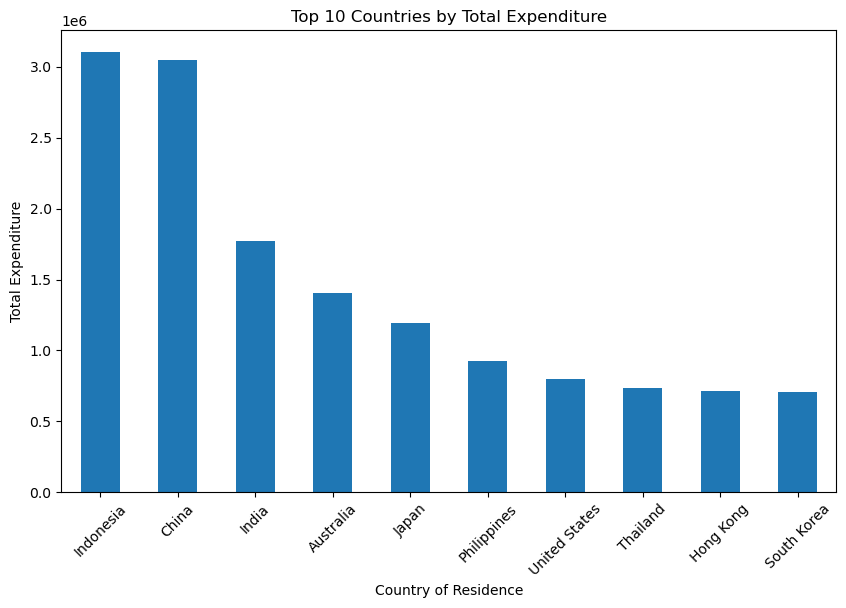

In [25]:
# Find the total spending by country and plot it out. 

# Calculate the total expenditure by each country
total_spending_by_country = unique_df.groupby('Country of Residence')['tot.exp'].sum()

# Sort the values and get the top 10
top_10_spending_countries = total_spending_by_country.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_spending_countries.plot(kind='bar')
plt.title('Top 10 Countries by Total Expenditure')
plt.xlabel('Country of Residence')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=45)
plt.show()

Indonesia customers spend the most in total in Singapore.   
We can then focus on Indonesia customers and look at their top spending categories and enhance promotion for that category in that country.  
This can be done using a function for all countries.  

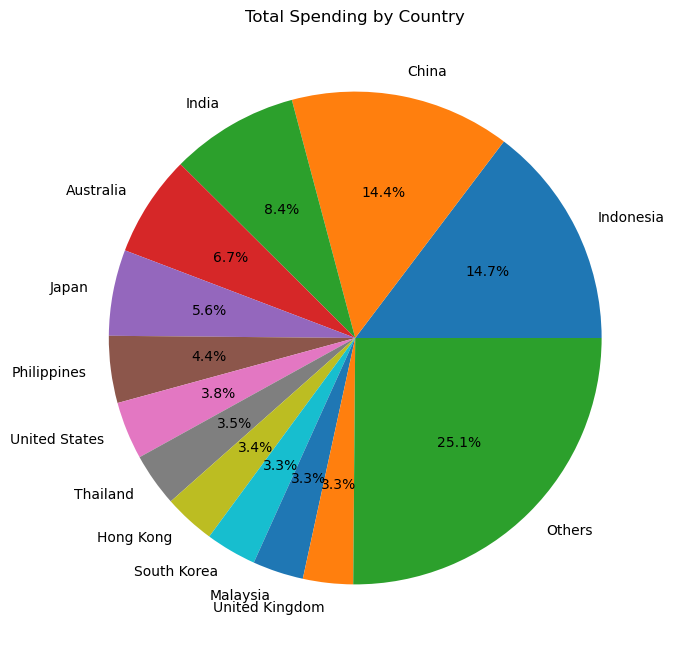

In [26]:
# Sort values in descending order
sorted_spending = total_spending_by_country.sort_values(ascending=False)

# Find countries with less than 3% of total spending
small_countries = sorted_spending[sorted_spending / sorted_spending.sum() < 0.03]

# Sum these small values into a single value labeled 'Others'
others_sum = small_countries.sum()
sorted_spending = sorted_spending[sorted_spending / sorted_spending.sum() >= 0.03]
sorted_spending['Others'] = others_sum

# Plotting the pie chart
sorted_spending.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Total Spending by Country')
plt.ylabel('')
plt.show()


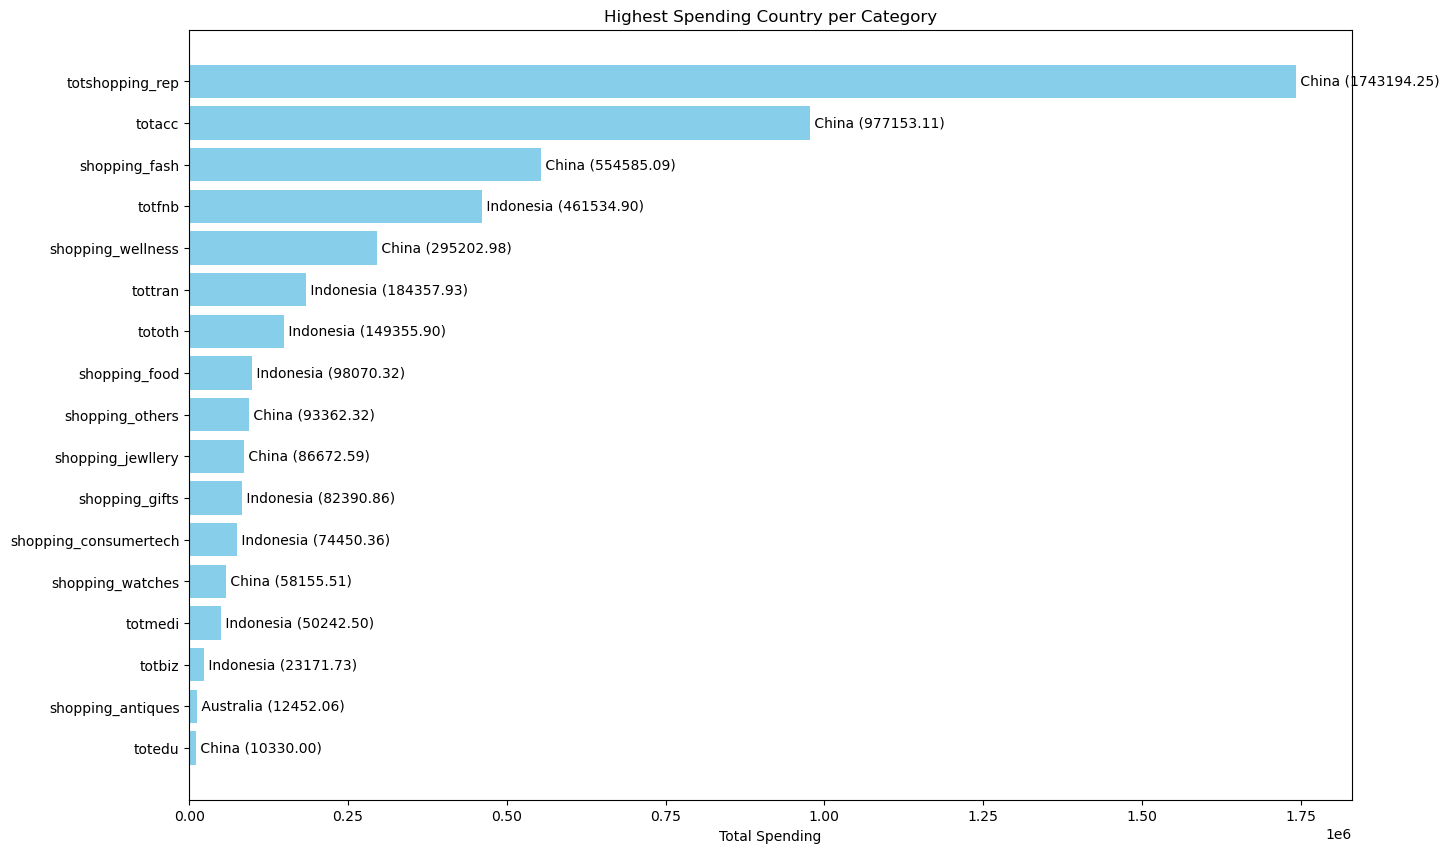

In [27]:
# Aggregate the sum for each spending category by country
grouped_data = df.groupby('Country of Residence')[spending_columns].sum()

# Find the country with the highest spending and the amount for each category
highest_spending_countries = {}
for col in spending_columns:
    highest_country = grouped_data[col].idxmax()
    highest_amount = grouped_data[col].max()
    highest_spending_countries[col] = (highest_country, highest_amount)

# Convert to DataFrame for easier sorting
highest_spending_df = pd.DataFrame(highest_spending_countries).T
highest_spending_df.columns = ['Country', 'Amount']
highest_spending_df = highest_spending_df.sort_values(by='Amount', ascending=True)

# Plotting the results
fig, ax = plt.subplots(figsize=(15, 10))

# Extract categories, countries, and amounts for plotting after sorting
categories = highest_spending_df.index.tolist()
countries = highest_spending_df['Country'].tolist()
amounts = highest_spending_df['Amount'].tolist()

# Create the bar chart
ax.barh(categories, amounts, color='skyblue')
ax.set_xlabel('Total Spending')
ax.set_title('Highest Spending Country per Category')

# Add country labels to the bars
for i, (country, amount) in enumerate(zip(countries, amounts)):
    ax.text(amount, i, f' {country} ({amount:.2f})', va='center')

plt.show()

Chinese tend to spend more on accoms according to this graph.   
We can enhance marketing on accoms, focusing on how clean and comforatble the accoms in Singapore is.  
If not, we can focus on areas that are weaker, such as antique shopping and gift shopping for Chinese customers.  

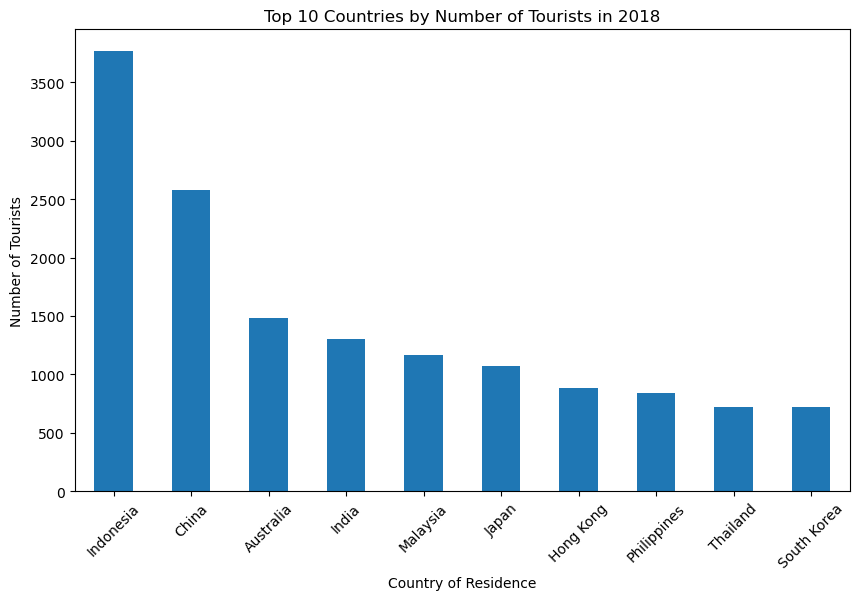

In [28]:
# Find the number of tourists arriving from each country in 2018
# Assuming 'case' column uniquely identifies each tourist
tourists_by_country = unique_df.groupby('Country of Residence')['case'].count()

# Sort the values and get the top 10
top_10_arrival = tourists_by_country.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_arrival.plot(kind='bar')
plt.title('Top 10 Countries by Number of Tourists in 2018')
plt.xlabel('Country of Residence')
plt.ylabel('Number of Tourists')
plt.xticks(rotation=45)
plt.show()


From heere, we can see that although Indonesian have the highest spending in total, it is likely due to the sheeer number of Indonesians visiting.  
In terms of average, Chinese or Australians may be more than Indonesians.  
According to graph below however, I am wrong and the tourists from places like Monaco spends the most. 

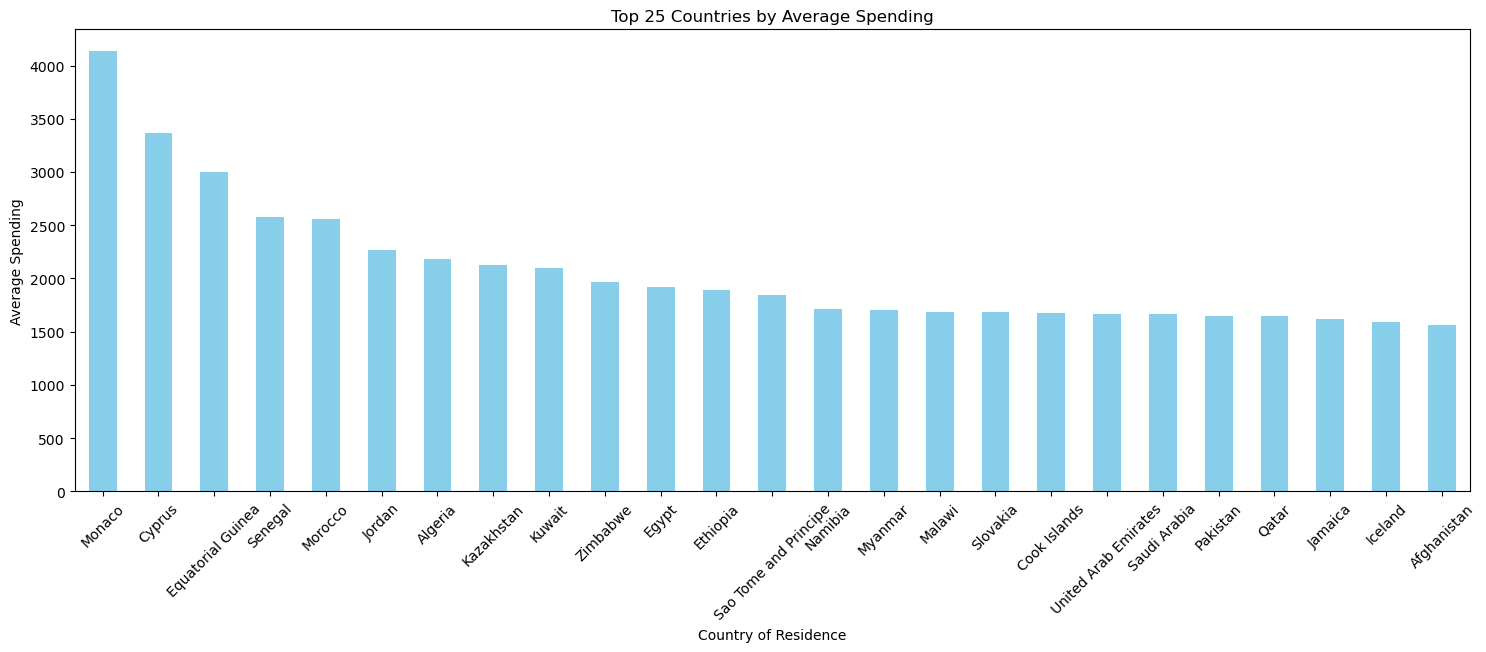

In [40]:
# Calculate average spending by country of residence
avg_spending_by_country = df.groupby('Country of Residence')['tot.exp'].mean()

# Sort the values and get the top 10
top_10_avg_spending = avg_spending_by_country.sort_values(ascending=False).head(25)

# Plotting
plt.figure(figsize=(18, 6))
top_10_avg_spending.plot(kind='bar', color='skyblue')
plt.title('Top 25 Countries by Average Spending')
plt.xlabel('Country of Residence')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()


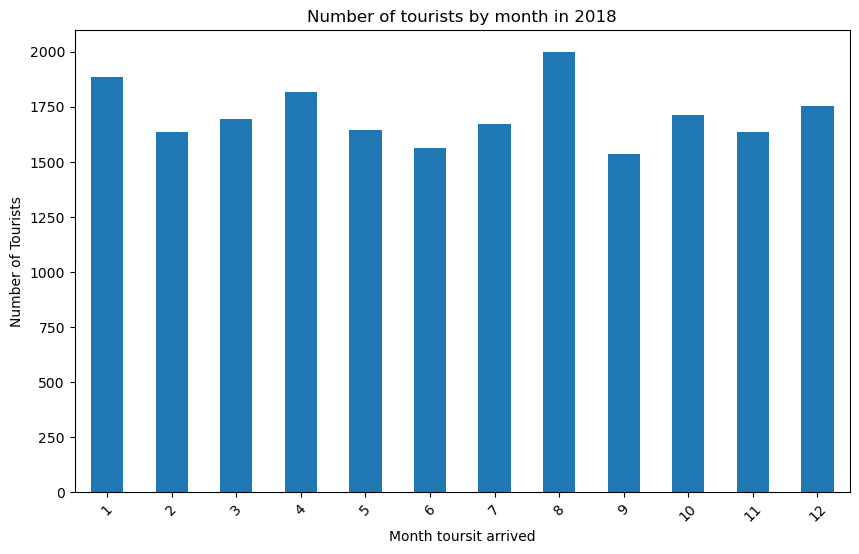

In [29]:
# Find the number of tourists arriving from each country in 2018
# Assuming 'case' column uniquely identifies each tourist
tourists_by_month = unique_df.groupby('month')['case'].count()

# Plotting
plt.figure(figsize=(10, 6))
tourists_by_month.plot(kind='bar')
plt.title('Number of tourists by month in 2018')
plt.xlabel('Month toursit arrived')
plt.ylabel('Number of Tourists')
plt.xticks(rotation=45)
plt.show()

The number of tourists in Feb is low, this may be due to the month is short.  
Other months, like March, May, June, September can have some events to help boost the tourist number, like F1 or concerts by famous international artists.  

/home/renewable_energy_1/miniconda3/envs/new_env/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


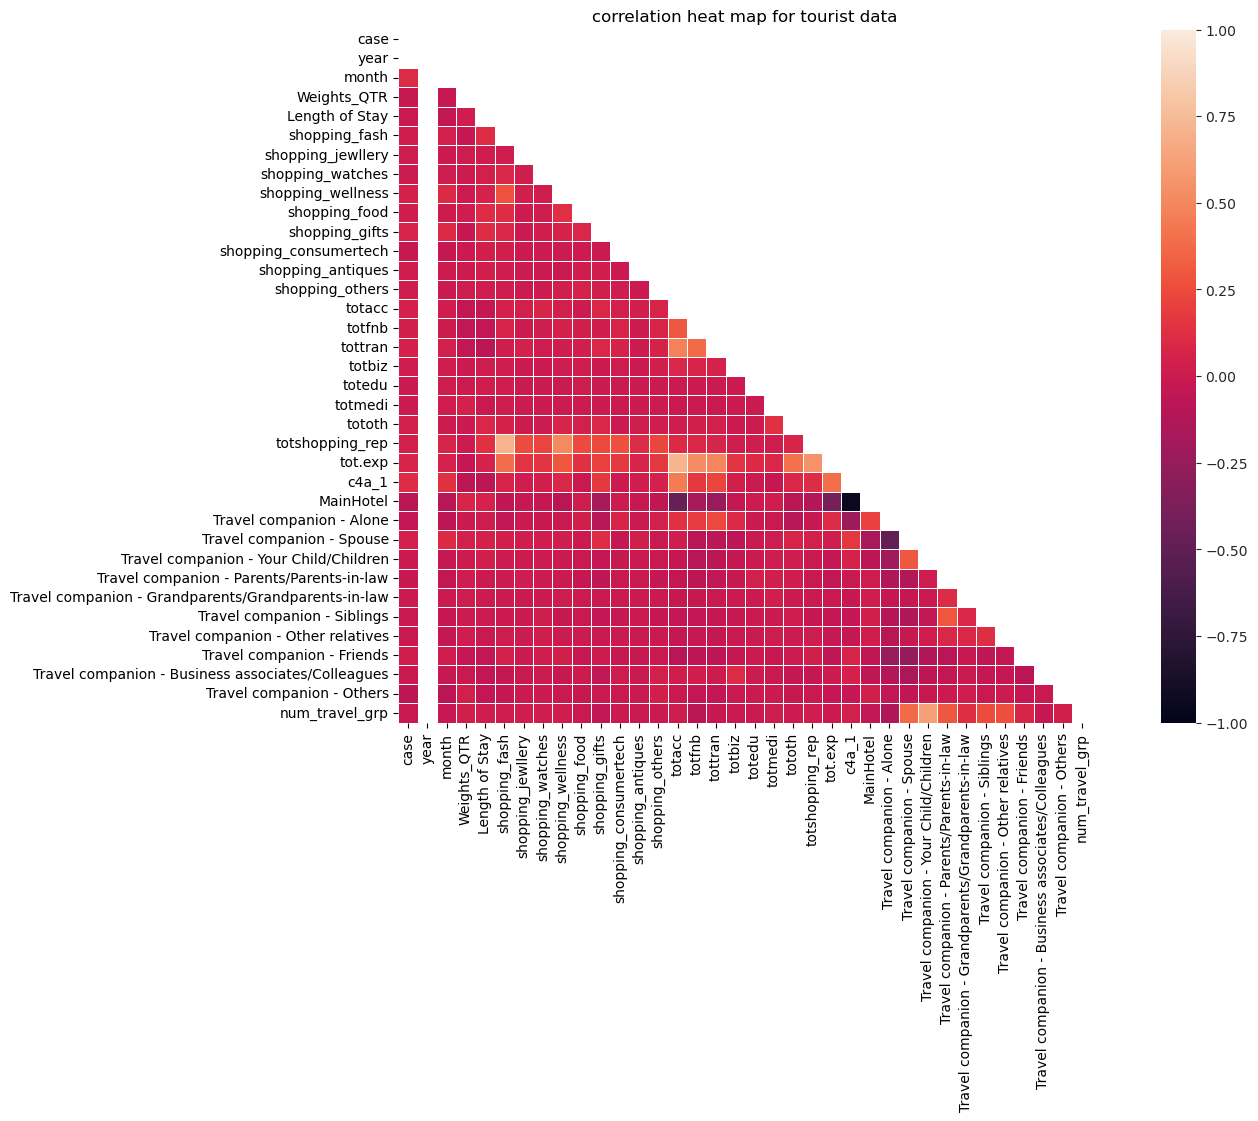

In [30]:
# Correlation of values
unique_df_copy = unique_df.copy(deep=True)
plt.figure(figsize = (18,9))
plt.title("correlation heat map for tourist data")
# Get correlation of variables.
corr = unique_df_copy.corr(numeric_only=True)
# Set up mask to be “True” in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

In [31]:
# Select the numerical columns from the dataframe
numerical_columns = unique_df.select_dtypes(include='number')

# Plot the pair plot
sns.pairplot(numerical_columns)


/home/renewable_energy_1/miniconda3/envs/new_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/renewable_energy_1/miniconda3/envs/new_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/renewable_energy_1/miniconda3/envs/new_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/renewable_energy_1/miniconda3/envs/new_env/lib/python3.11/site-packages/seaborn/_oldcore.py

 b. Is there a correlation between travel companions and choice of hotel?   

In [32]:
# Filter out the rows with 'Length of Stay' equal to 0
valid_entries = unique_df.loc[unique_df['Length of Stay'] > 0]
# Calculate the average expenditure per day
valid_entries['totacc_per_day'] = valid_entries['totacc'] / valid_entries['Length of Stay']
# Find the average expenditure per day for each hotel
average_totacc_per_hotel = valid_entries.groupby('MainHotel')['totacc_per_day'].mean()
# Sort the values and get the top 10
average_totacc_per_hotel.sort_values(ascending=False).head(10)

/tmp/ipykernel_773474/14037482.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_entries['totacc_per_day'] = valid_entries['totacc'] / valid_entries['Length of Stay']


MainHotel
832.0     2826.200000
2002.0    1017.470000
789.0     1012.186090
902.0      708.230522
437.0      627.525896
66.0       616.279179
873.0      612.243000
465.0      567.109722
84.0       558.913039
71.0       525.821243
Name: totacc_per_day, dtype: float64

In [33]:
# Calculating the average 'totacc_per_day' for each travel companion type
average_spending_by_companion_type = {}
for companion_type in travel_type_list:
    # Filtering entries where the specific companion type is present
    companion_entries = valid_entries[valid_entries[companion_type] == 1]

    # Calculating the average spending
    average_spending = companion_entries['totacc_per_day'].mean()

    # Storing the result
    average_spending_by_companion_type[companion_type] = average_spending

average_spending_by_companion_type


{'Travel companion - Alone': 271.3918951142062,
 'Travel companion - Spouse': 128.06812780650105,
 'Travel companion - Your Child/Children': 109.62344361155924,
 'Travel companion - Parents/Parents-in-law': 109.90021430113097,
 'Travel companion - Grandparents/Grandparents-in-law': 95.74685064935065,
 'Travel companion - Siblings': 91.04525537009003,
 'Travel companion - Other relatives': 108.98885307439475,
 'Travel companion - Friends': 108.4362874324788,
 'Travel companion - Business associates/Colleagues': 228.84176740445562,
 'Travel companion - Others': 237.97566001716004}

When the Travel Companion is not reported, then the average price per hotel per night is 92.749.    
The code is shown in the cell below.  

In [34]:
# Group by 'Travel Type' and calculate the average 'totacc_per_day'
average_spending_by_travel_type = valid_entries.groupby(travel_type_list)['totacc_per_day'].mean()

average_spending_by_travel_type[0]

Travel companion - Spouse  Travel companion - Your Child/Children  Travel companion - Parents/Parents-in-law  Travel companion - Grandparents/Grandparents-in-law  Travel companion - Siblings  Travel companion - Other relatives  Travel companion - Friends  Travel companion - Business associates/Colleagues  Travel companion - Others
0                          0                                       0                                          0                                                    0                            0                                   0                           0                                                  0                             98.224591
                                                                                                                                                                                                                                                                                                                   1            

In [35]:
# Define the list of top 10 hotels
main_hotel_lst = [832, 2002, 789, 902, 437, 66, 873, 465, 84, 71]

# Filter the dataframe for entries from these hotels
top_hotels_df = df[df['MainHotel'].isin(main_hotel_lst)]

# Group by 'MainHotel' and 'case', then sum the companion type counts
grouped = top_hotels_df.groupby(['MainHotel', 'case'])[travel_type_list].sum()

# Reset index to turn the groupby result into a dataframe
grouped_reset = grouped.reset_index()

# Aggregate the sum for each hotel
sum_by_hotel = grouped_reset.groupby('MainHotel')[travel_type_list].sum()

# Find the companion type with the highest count for each hotel
highest_companion_per_hotel = sum_by_hotel.idxmax(axis=1)
highest_companion_per_hotel



MainHotel
66.0      Travel companion - Spouse
71.0      Travel companion - Spouse
84.0       Travel companion - Alone
437.0     Travel companion - Spouse
465.0      Travel companion - Alone
789.0     Travel companion - Spouse
832.0      Travel companion - Alone
873.0      Travel companion - Alone
902.0      Travel companion - Alone
2002.0     Travel companion - Alone
dtype: object

From the data given, it seems that when staying alone, the hotel will be most expensive.    
This is not conclusive, as no statistical test was done.   
What can be done is to apply statistical tests.   
We can set up:   
H0: Travel companion - Alone do not have highest spending for accoms per night.  
H1: Travel companion - Alone spend the highest on accoms per night.  

In [36]:
# Split the data into two groups
group_alone = valid_entries[valid_entries['Travel companion - Alone'] == 1]['totacc_per_day']
group_not_alone = valid_entries[valid_entries['Travel companion - Alone'] == 0]['totacc_per_day']

# Perform the t-test
t_stat, p_value = ttest_ind(group_alone, group_not_alone, equal_var=False)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis, suggesting that travelers alone have a significantly different spending on accommodations per night.")
else:
    print("Fail to reject the null hypothesis, no significant difference found.")


Reject the null hypothesis, suggesting that travelers alone have a significantly different spending on accommodations per night.


From test result, we can see that Travel Companion - Alone tend to spend more on hotel per night.  
Again, this may not be conclusive since there are quite a number of travellers who did not report if they are tarvelling with Companion. 